In [3]:
### in this cell we import necessary libraries for the demo
import numpy as np                                        # a fundamental numerical linear algebra library
import matplotlib.pyplot as plt                           # a basic plotting library
from sklearn.preprocessing import PolynomialFeatures      # a function for transforming data via a polynomial of given degree
from sklearn import linear_model                          # the scikit-learn linear regression module
from sklearn.ensemble import GradientBoostingRegressor    # a scikit-learn tree regression module
from sklearn.neural_network import MLPRegressor           # a scikit-learn neural network regresion module
import pandas as pd

# this line is required in order to plot in a jupyter notebook itself
%matplotlib inline  

In [12]:
# generate true function
true_x = np.linspace(0,1,200)
true_y = true_x*np.abs(np.sin(2*np.pi*true_x))

# generate data from true function
num_pts = 30
data_x = np.random.rand(num_pts)
data_y = data_x*np.abs(np.sin(2*np.pi*data_x))
noise = 0.05*np.random.randn(num_pts)
data_y+=noise

In [13]:
# save underlying function and data - first reshape 
true_x = np.asarray(true_x)
true_x.shape = (len(true_x),1)

true_y = np.asarray(true_y)
true_y.shape = (len(true_y),1)

data_x = np.asarray(data_x)
data_x.shape = (len(data_x),1)

data_y = np.asarray(data_y)
data_y.shape = (len(data_y),1)

true_func = np.concatenate((true_x,true_y),axis = 1)
all_data = np.concatenate((data_x,data_y),axis = 1)

# convert to dataframe and save as csv
true_func = pd.DataFrame(true_func,index = None)
true_func.to_csv('true_func.csv',index = None, header = False)

In [14]:
# convert to dataframe and save as csv
all_data = pd.DataFrame(all_data,index = None)
all_data.to_csv('example_data.csv',index = None, header = False)

In [ ]:
import regression_layer_1_utils as utils

In [20]:
def make_circle_classification_dataset(num_pts):
    '''
    This function generates a random circle dataset with two classes. 
    You can run this a couple times to get a distribution you like visually.  
    You can also adjust the num_pts parameter to change the total number of points in the dataset.
    '''

    # generate points
    num_pts = 80                     # total number of points
    num_misclass = 5                 # total number of misclassified points
    x = np.random.rand(num_pts,1)
    y = np.random.rand(num_pts,1)
    
    # assign labels based on curve
    s = np.linspace(0,1,100)
    t = np.linspace(0,1,100)
    poly_boundary = s**2 - t**2 + s - t

    # make labels and flip a few to show some misclassifications
    labels = radi.copy()    
    
    flip = np.random.permutation(num_pts)
    flip = flip[:num_misclass]
    for i in flip:
        labels[i]=1/float(labels[i] + 0.001)
        
    pos_inds = np.argwhere(labels < 1)
    pos_inds = [s[0] for s in pos_inds]

    neg_inds = np.argwhere(labels >=1)
    neg_inds = [s[0] for s in neg_inds]

    labels[pos_inds] = +1
    labels[neg_inds] = -1

    # save dataset as csv
    x = np.asarray(x)
    x.shape = (len(x),1)
    y.shape = (len(y),1)
    labels = np.asarray(labels)
    labels.shape = (len(labels),1)
    dataset = np.concatenate( (x,y),axis = 1)
    all_data = np.concatenate((dataset,labels),axis = 1)
    all_data = pd.DataFrame(all_data)
    all_data.columns = ['x-coordinate','y-coordinate','label']
    all_data.to_csv('circle_data.csv',index = False)
    
    # save true separator
    s = np.linspace(0,1,200)
    x_f = np.cos(2*np.pi*s)
    x_f.shape = (len(x_f),1)
    y_f = np.sin(2*np.pi*s)
    y_f.shape = (len(y_f),1)
    all_func = np.concatenate((x_f,y_f),axis = 1)
    all_func = pd.DataFrame(all_func)
    all_func.to_csv('circle_func.csv',index = False)
    
    # return datapoints and labels for further 
    return x,y,labels,x_f,y_f

In [21]:
all_data = make_circle_classification_dataset(num_pts = 80)

In [16]:
def make_curvy_classification_dataset(num_pts):
    '''
    This function generates a random circle dataset with two classes. 
    You can run this a couple times to get a distribution you like visually.  
    You can also adjust the num_pts parameter to change the total number of points in the dataset.
    '''

    # generate points
    num_misclass = 4                 # total number of misclassified points
    x = np.random.rand(num_pts)
    y = np.random.rand(num_pts)
    
    # make labels and flip a few to show some misclassifications
    labels = np.ones((num_pts,1))
    tester = 0.3*(x**2 - np.cos(2*np.pi*x)) + 0.5
    ind = np.argwhere(y < tester)
    ind = [s[0] for s in ind]
    labels[ind] = -1

    flip = np.random.permutation(num_pts)
    flip = flip[:num_misclass]
    for i in flip:
        labels[i]*=(-1)

    # save dataset as csv
    x = np.asarray(x)
    x.shape = (len(x),1)
    y.shape = (len(y),1)
    labels = np.asarray(labels)
    labels.shape = (len(labels),1)
    dataset = np.concatenate( (x,y),axis = 1)
    all_data = np.concatenate((dataset,labels),axis = 1)
    all_data = pd.DataFrame(all_data)
    all_data.columns = ['x-coordinate','y-coordinate','label']
    all_data.to_csv('datasets/poly_data.csv',index = False)
    
    # save true separator
    x_f = np.linspace(0,1,200)
    x_f.shape = (len(x_f),1)
    y_f = 0.3*(x_f**2 - np.cos(2*np.pi*x_f)) + 0.5
    y_f.shape = (len(y_f),1)
    all_func = np.concatenate((x_f,y_f),axis = 1)
    all_func = pd.DataFrame(all_func)
    all_func.to_csv('datasets/poly_func.csv',index = False)
    
    # return datapoints and labels for further 
    return x,y,labels,x_f,y_f

In [17]:
data_x,data_y,labels,sep_x,sep_y = make_curvy_classification_dataset(num_pts = 200)

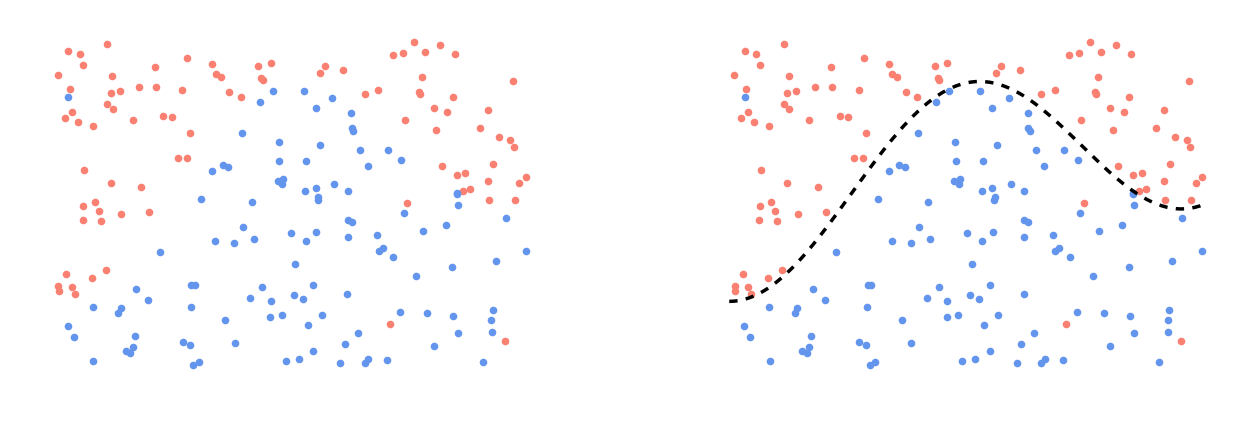

In [18]:
### in this cell we import necessary libraries for the demo
import numpy as np                  # a fundamental numerical linear algebra library
import matplotlib.pyplot as plt     # a basic plotting library
import pandas as pd                 # a basic data handling library
import sys
sys.path.append('utils')


# this line is required in order to plot in a jupyter notebook itself
%matplotlib inline         

# load in the data and true function
data = np.asarray(pd.read_csv('datasets/poly_data.csv'))
data_x = data[:,0]
data_y = data[:,1]
labels = data[:,2]

func = np.asarray(pd.read_csv('datasets/poly_func.csv'))
true_x = func[:,0]
true_y = func[:,1]

# plot the data and true underlying data-generating function
import classification_layer_1_utils as utils  # a set of simple plotting utilities for this notebook
utils.cust_plt_util(data_x,data_y,labels,true_x,true_y)

In [15]:
print np.shape(data_x)

(80,)
